# Rice-Mele model and adiabatic pumping

In this notebook we explore adiabatic pumping in time dependent one dimensional systems through the Rice-Mele model. The Rice-Mele model is a generalization of the Su-Schrieffer-Heeger model where we allow for generally time dependent hopping parameters and also add an extra time dependent sublattice potenital $u$ that has opposite sign on the two sublattices. 

In [1]:
# The usual imports
%pylab inline
from ipywidgets import *
# Some extra imports for 3D  
from mpl_toolkits.mplot3d import *
# These are only needed to make things pretty..
# they are mostly refered to in the formatting part of the figures
# and enshure us to have the figures also present in the book.
from matplotlib.patches import FancyArrowPatch
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# this generates a parameter mesh in momentum and time
kran,tran=meshgrid(linspace(-pi,pi,30),linspace(0,1,51))
# a helper function for defining the d vector
def dkt(k,t,uvw):
    '''
    A simple function that returns the d vector of the RM model.
    '''
    return [uvw(t)[1]+uvw(t)[2]*cos(k),uvw(t)[2]*sin(k),uvw(t)[0]]

## The control freak sequence

Let us first explore a time dependent pump which for all times $t$ is in the dimerized limit, that is either the intracell $v(t)$ or the intercell $w(t)$ hopping is zero. 

In [3]:
def f(t):
    '''
    A piecewise function for the control freak sequence
    used to define u(t),v(t),w(t)
    '''

    t=mod(t,1);
    
    return (
        8*t*((t>=0)&(t<1/8))+\
    (0*t+1)*((t>=1/8)&(t<3/8))+\
    (4-8*t)*((t>=3/8)&(t<1/2))+\
        0*t*((t>=1/2)&(t<1))); 

def uvwCF(t):
    '''
    u,v and w functions of the control freak sequence
    '''
    return array([f(t)-f(t-1/2),2*f(t+1/4),f(t-1/4)])

Below we write a generic function that takes the functions $u(t)$,$v(t)$ and $w(t)$ as an argument and then visualizes the pumping process in $d$-space. We will use this function to explore the control freak sequence and the later on also the not so control freak sequence.

In [4]:
def seq_and_d(funcs,ti=10):
    '''
    A figure generating function for the Rice Mele model.
    It plots the functions defining the sequence and the d-space structure.    
    '''
    figsize(10,5)
    fig=figure()
    func=eval(funcs);
    ax1=fig.add_subplot(121)
    ftsz=20
    # plotting the functions defining the sequence
    plot(tran[:,0],func(tran[:,0])[1],'k-',label=r'$v$',linewidth=3)
    plot(tran[:,0],func(tran[:,0])[2],'g--',label=r'$w$',linewidth=3)
    plot(tran[:,0],func(tran[:,0])[0],'m-',label=r'$u$',linewidth=3)
    plot([tran[ti,0],tran[ti,0]],[-3,3],'r-',linewidth=3)
    # this is just to make things look like in the book
    ylim(-1.5,2.5)
    legend(fontsize=20,loc=3)
    xlabel(r'time $t/T$',fontsize=ftsz)
    xticks(linspace(0,1,5),[r'$0$',r'$0.25$',r'$0.5$',r'$0.75$',r'$1$'],fontsize=ftsz)
    ylabel(r'amplitudes $u,v,w$',fontsize=ftsz)
    yticks([-1,0,1,2],[r'$-1$',r'$0$',r'$1$',r'$2$'],fontsize=ftsz)
    grid(True)

    ax2=fig.add_subplot(122, projection='3d')
    # plotting d space image of the pumping sequence
    plot(*dkt(kran[ti,:],tran[ti,:],func),marker='o',mec='red',mfc='red',ls='-',lw=6,color='red')
    plot(*dkt(kran.flatten(),tran.flatten(),func),color='blue',alpha=0.5)
    # this is just to make things look like in the book
    # basically everything below is just to make things look nice..
    ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax2.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax2.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax2.set_axis_off()
    ax2.grid(False)
    arrprop=dict(mutation_scale=20, lw=1,arrowstyle='-|>,head_length=1.4,head_width=0.6',color="k")
    ax2.add_artist(Arrow3D([-2,4],[0,0],[0,0], **arrprop))
    ax2.add_artist(Arrow3D([0,0],[-2,3.3],[0,0], **arrprop))
    ax2.add_artist(Arrow3D([0,0],[0,0],[-1,2], **arrprop))
    ftsz2=30
    ax2.text(4.4, -1,  0, r'$d_x$', None,fontsize=ftsz2)
    ax2.text(0.3, 3.0, 0, r'$d_y$', None,fontsize=ftsz2)
    ax2.text(0, 0.6, 2.0, r'$d_z$', None,fontsize=ftsz2)
    ax2.plot([0],[0],[0],'ko',markersize=8)
    ax2.view_init(elev=21., azim=-45)
    ax2.set_aspect(1.0)
    ax2.set_zlim3d(-0.5, 2)                    
    ax2.set_ylim3d(-0.5, 2)
    ax2.set_xlim3d(-0.5, 2)
    tight_layout()


Now let us see what happends as time proceedes! 

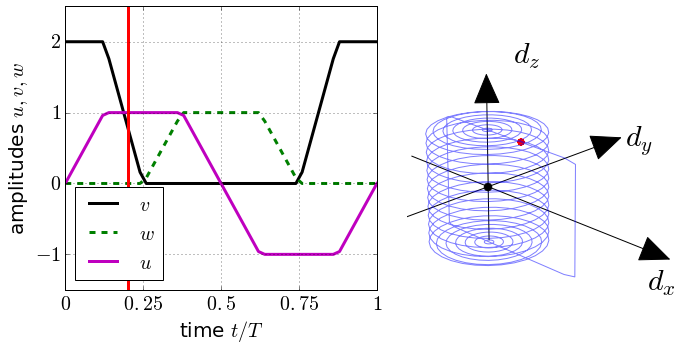

In [5]:
interact(seq_and_d,funcs=fixed('uvwCF'),ti=(0,len(tran[:,0])-1));

Now that we have explored the momentum space behaviour let us again look at a small real space sample! First we define a function that generates Rice-Mele type finitel lattice Hamiltonians for given values of $u$,$v$ and $w$.

In [6]:
def H_RM_reals(L,u,v,w,**kwargs):
    '''
    A function to bulid a finite RM chain.
    The number of unitcells is L.
    As usual v is intracell and w ins intercell hopping.
    We also have now an asymmetric sublattice potential u.
    '''
    idL=eye(L); # identity matrix of dimension L
    odL=diag(ones(L-1),1);# upper off diagonal matrix with ones of size L
    odc=matrix(diag([1],-L+1));#lower corner for periodic boundary condition
    U=matrix([[u,v],[v,-u]]) # intracell
    T=matrix([[0,0],[1,0]]) # intercell
    
    p=0
    if kwargs.get('periodic',False):
        p=1
        
    H=(kron(idL,U)+
       kron(odL,w*T)+
       kron(odL,w*T).H+
       p*(kron(odc,w*T)+kron(odc,w*T).H))
    return H



Next we define a class that we will mainly use to hold data about our pumping sequence. The information in these objects will be used to visualize the spectrum and wavefunctions of bulk and edge localized states.

In [7]:
class pumpdata:
    '''
    A class that holds information on spectrum and wavefunctions
    of a pump sequence performed on a finite lattice model.
    Default values are tailored to the control freak sequence.
    '''
    def __init__(self,L=10,numLoc=1,norm_treshold=0.99,func=uvwCF,**kwargs):
        '''
        Initialization function. The default values are set in such a way that they correspond
        to the control freak sequence.
        '''
        
        
        self.L=L         
        self.dat=[]             # We will collect the data to be
        self.vecdat=[]          # plotted in these arrays.
        self.lefty=[]
        self.righty=[]
        self.lefty=[]
        self.righty=[]
        
        tlim=kwargs.get('edge_tlim',(0,1)) # We can use this to restrict in time 
                                      # classification of left and right localized states
        for t in tran[:,0]:
            u,v,w=func(t)         # obtain u(t),v(t) and w(t)
            H=H_RM_reals(L,u,v,w) # 
            eigdat=eigh(H);       # for a given t here we calculate the eigensystem (values and vectors)
            if tlim[0]<t<tlim[1]:
                # for the interesting time intervall we look for states localized to the edge
                for i in range(2*L):
                    if sum((array(eigdat[1][0::2,i])**2+array(eigdat[1][1::2,i])**2)[0:2*numLoc:2])>norm_treshold:
                        self.lefty=append(self.lefty,[[t,eigdat[0][i]]]);
                    if sum((array(eigdat[1][0::2,i])**2+array(eigdat[1][1::2,i])**2)[:L-2*numLoc:-2])>norm_treshold:
                        self.righty=append(self.righty,[[t,eigdat[0][i]]]);

            self.dat=append(self.dat,eigdat[0]);
            self.vecdat=append(self.vecdat,eigdat[1]);
    
        self.dat=reshape(self.dat,[len(tran[:,0]),2*L]);          # rewraping the data
        self.vecdat=reshape(self.vecdat,[len(tran[:,0]),2*L,2*L]) # to be more digestable


Now let us create an instance of the above class with the data of the control freak pump sequence:

In [8]:
# Filling up data for the control freak sequence
CFdata=pumpdata(edge_tlim=(0.26,0.74))

Finally we write a simple function to visualize the spectrum and the wavefunctions in a symmilar fashion as we did for the SSH model. We shall now explicitly mark the edge states in the spectrum with red and blue. 

In [9]:
def enpsi(PD,ti=10,n=10):
    figsize(14,5)
    subplot(121)
    lcol='#53a4d7'
    rcol='#d7191c'
    # Plotting the eigenvalues and 
    # a marker showing for which state 
    # we are exploring the wavefunction
    plot(tran[:,0],PD.dat,'k-');            
    (lambda x:plot(x[:,0],x[:,1],'o',mec=lcol,mfc=lcol,
                   markersize=10))(reshape(PD.lefty,(PD.lefty.size/2,2)))
    (lambda x:plot(x[:,0],x[:,1],'o',mec=rcol,mfc=rcol,
                   markersize=10))(reshape(PD.righty,(PD.righty.size/2,2)))
    plot(tran[ti,0],PD.dat[ti,n],'o',markersize=13,mec='k',mfc='w')
    
    # Make it look like the book    
    xlabel(r'$t/T$',fontsize=25);
    xticks(linspace(0,1,5),fontsize=25)
    ylabel(r'energy $E$',fontsize=25);
    yticks(fontsize=25)
    ylim(-2.99,2.99)
    grid()

    subplot(122)
    # Plotting the sublattice resolved wavefunction
    bar(array(range(0,2*PD.L,2)),  real(array(PD.vecdat[ti][0::2,n].T)),0.9,color='grey',label='A')  # sublattice A
    bar(array(range(0,2*PD.L,2))+1,real(array(PD.vecdat[ti][1::2,n].T)),0.9,color='white',label='B') # sublattice B
    
    # Make it look like the book
    xticks(2*(array(range(10))),['     '+str(i) for i in array(range(11))[1:]],fontsize=25)
    ylim(-1.2,1.2)
    yticks(linspace(-1,1,5),fontsize=25,x=1.2)
    ylabel('Wavefunction',fontsize=25,labelpad=-460,rotation=-90)
    grid()
    legend(loc='lower right')
    xlabel(r'cell index $m$',fontsize=25);
    
    tight_layout()

We can now interact with the above function and see the evolution of the surface states. 

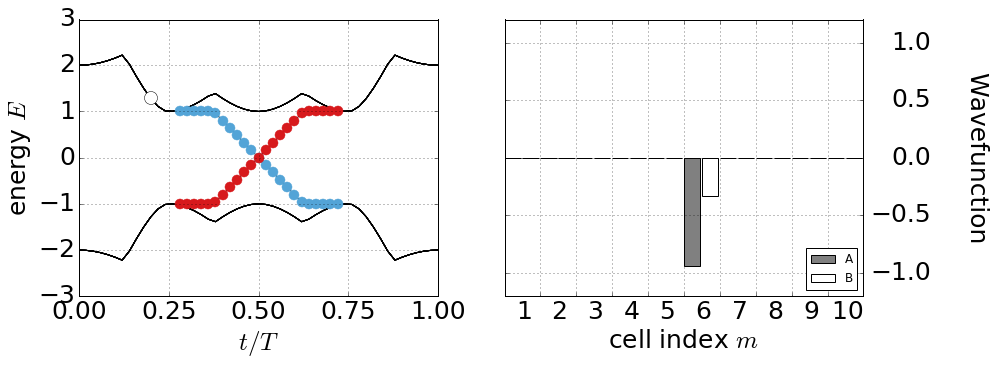

In [10]:
interact(enpsi,PD=fixed(CFdata),ti=(0,len(tran[:,0])-1),n=(0,19));

To complete the analysis of the control freak sequence we now investigate the flow of Wannier centers in time in a chain with periodic boundary conditions. We again first define a class that holds the approporiate data and then write a plotting function. 

In [11]:

class wannierflow:
    '''
    A class that holds information on Wannier center flow.
    
    '''
    def __init__(self,L=6,func=uvwCF,periodic=True,tspan=linspace(0,1,200),**kwargs):
        self.L=L
        self.func=func
        self.periodic=periodic
        self.tspan=tspan
        # get position operator
        if self.periodic:
            POS=matrix(kron(diag(exp(2.0j*pi*arange(L)/(L))),eye(2))) 
        else:
            POS=matrix(kron(diag(arange(1,L+1)),eye(2))) 
        Lwanflow=[]
        Hwanflow=[]
        for t in tspan:
            u,v,w=uvwCF(t) 
            H=H_RM_reals(L,u,v,w,periodic=periodic)
            sys=eigh(H)
            
            Lval=sys[0][sys[0]<0]
            Lvec=matrix(sys[1][:,sys[0]<0])
            LP=Lvec*Lvec.H
            LW=LP*POS*LP
            LWval,LWvec=eig(LW)
            LWe=real(diag(LWvec.H*H*LWvec))
    
            Hval=sys[0][sys[0]>0]
            Hvec=matrix(sys[1][:,sys[0]>0])
            HP=Hvec*Hvec.H
            HW=HP*POS*HP
            HWval,HWvec=eig(HW)
            HWe=real(diag(HWvec.H*H*HWvec))
            
            if periodic:
                Lwanflow=append(Lwanflow,L/(2*pi)*sort(angle(LWval[abs(LWval)>1e-10])))
                Hwanflow=append(Hwanflow,L/(2*pi)*sort(angle(HWval[abs(HWval)>1e-10])))
            else:
                Lwanflow=append(Lwanflow,sort(LWval[abs(LWval)>1e-10]))
                Hwanflow=append(Hwanflow,sort(HWval[abs(HWval)>1e-10]))
        self.Lwanflow=Lwanflow
        self.Hwanflow=Hwanflow
        
    def plot_w_vs_t(self,LorH='Lower band',*args,**kwargs):
        '''
        A function for plotting the Wannier flow.
        '''
        figsize(7,5)
        data=eval('self.'+(LorH[0] if (LorH[0] in ['L','H']) else 'L')+'wanflow')
        for i in range(self.L):            
            descr=(LorH if i==0 else '')            
            plot(real(data[i::self.L]),self.tspan,*args,label=descr,**kwargs)
        xticks(fontsize=25)
        yticks(linspace(0,1,5),fontsize=25)
        xlabel(r'position $\langle \hat{x}\rangle$',fontsize=25);
        ylabel(r"time $t/T$",fontsize=25);
        legend(fontsize=15)
        grid()
        
 
   

        
        

In [12]:
CFwan=wannierflow()

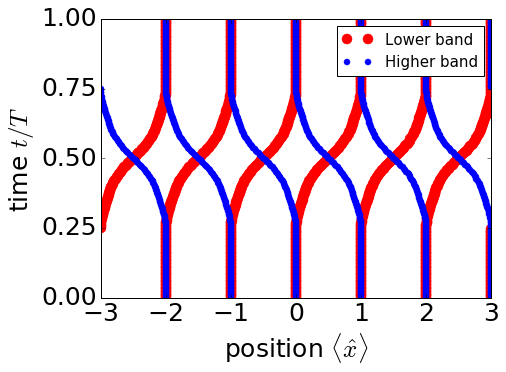

In [13]:
CFwan.plot_w_vs_t('Lower band','o',mec='red',mfc='red',ms=10)
CFwan.plot_w_vs_t('Higher band','o',mec='blue',mfc='blue')

We have now done all the heavy lifting with regards of coding. Now we can reuse all the plotting and data generating classes and functions for other sequences.

## Moving away from the control freak sequence

In [14]:
def uvwNSCF(t):
    '''
    The u,v and w functions of the not so control freak sequence.
    For the time beeing we assume vbar to be fixed.
    '''
    vbar=1
    return array([sin(t*(2*pi)),vbar+cos(t*(2*pi)),1*t**0])

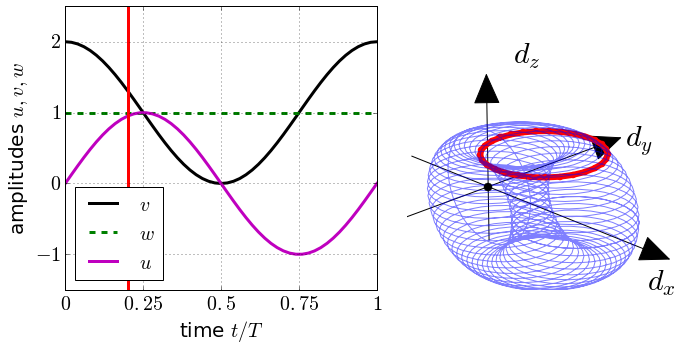

In [15]:
interact(seq_and_d,funcs=fixed('uvwNSCF'),ti=(0,len(tran[:,0])-1));

In [16]:
# Generating the not-so control freak data
NSCFdata=pumpdata(numLoc=2,norm_treshold=0.6,func=uvwNSCF)

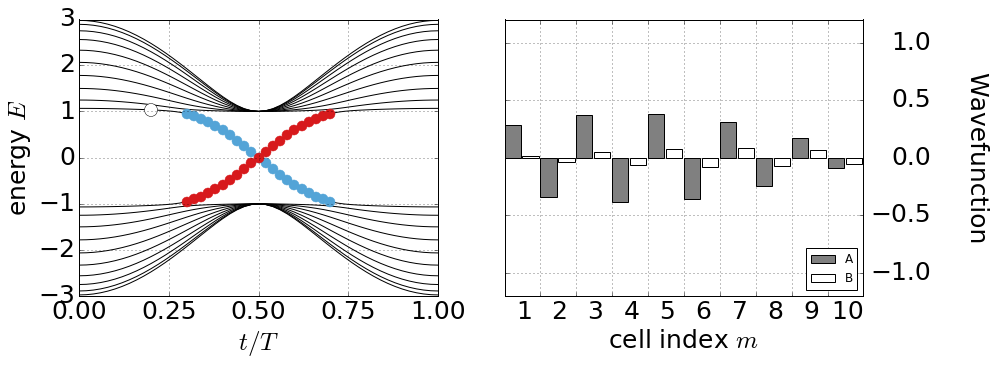

In [17]:
interact(enpsi,PD=fixed(NSCFdata),ti=(0,len(tran[:,0])-1),n=(0,19));

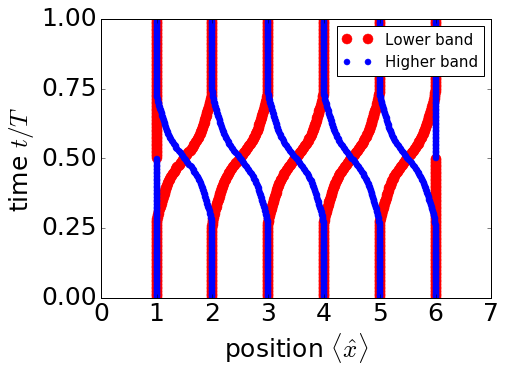

In [18]:
NSCFwan=wannierflow(periodic=False,func=uvwNSCF)
NSCFwan.plot_w_vs_t('Lower band','o',mec='red',mfc='red',ms=10)
NSCFwan.plot_w_vs_t('Higher band','o',mec='blue',mfc='blue')